## Assignment-2 Shivam Lahoti

## Part-1

In [1]:

!pip install -q -U google-generativeai

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'E:\\ANACONDA\\Lib\\site-packages\\google\\ai\\generativelanguage_v1\\services\\generative_service\\transports\\grpc_asyncio.py'
Consider using the `--user` option or check the permissions.



In [49]:
!pip install gemini

     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
      --------------------------------------- 0.0/1.6 MB 660.6 kB/s eta 0:00:03
      --------------------------------------- 0.0/1.6 MB 660.6 kB/s eta 0:00:03
      --------------------------------------- 0.0/1.6 MB 660.6 kB/s eta 0:00:03
     - -------------------------------------- 0.1/1.6 MB 328.2 kB/s eta 0:00:05
     - -------------------------------------- 0.1/1.6 MB 328.2 kB/s eta 0:00:05
     -- ------------------------------------- 0.1/1.6 MB 270.5 kB/s eta 0:00:06
     -- ------------------------------------- 0.1/1.6 MB 328.2 kB/s eta 0:00:05
     ---- ----------------------------------- 0.2/1.6 MB 446.5 kB/s eta 0:00:04
     ----- ---------------------------------- 0.2/1.6 MB 509.6 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.6 MB 509.6 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.6 MB 5

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [40 lines of output]
  # pysam: cython is available - using cythonize if necessary
  # pysam: htslib mode is shared
  # pysam: HTSLIB_CONFIGURE_OPTIONS=None
  '.' is not recognized as an internal or external command,
  operable program or batch file.
  '.' is not recognized as an internal or external command,
  operable program or batch file.
  # pysam: htslib configure options: None
  Traceback (most recent call last):
    File "E:\ANACONDA\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "E:\ANACONDA\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "E:\ANACONDA\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_

In [48]:
import google.generativeai as genai
import json
import requests
import gemini

ModuleNotFoundError: No module named 'gemini'

In [38]:

events_2024 = {
    "Olympic Games": {
        "location": "Paris, France",
        "start_date": "July 26, 2024",
        "end_date": "August 11, 2024",
        "description": "The 2024 Summer Olympics, officially known as the Games of the XXXIII Olympiad, will take place in Paris, marking the third time the city has hosted the event.",
        "key_highlights": ["New sports added", "Sustainability focus", "High-profile athletes", "New records expected"],
        "citation": "https://olympics.com/en/olympic-games/paris-2024"
    },
    "U.S. Presidential Election": {
        "location": "United States",
        "date": "November 5, 2024",
        "description": "The 2024 United States presidential election will be the 60th quadrennial presidential election. Voters will choose the electors of the Electoral College, who in turn will elect the next president and vice president of the United States.",
        "key_highlights": ["High voter turnout expected", "Critical swing states", "Major political debates", "Global implications"],
        "citation": "https://www.fec.gov/introduction-campaign-finance/election-and-voting-information/presidential-elections-2024/"
    },
    "NASA Artemis III Mission": {
        "location": "Moon",
        "date": "December 2024 (estimated)",
        "description": "Artemis III is planned to be NASA's first crewed mission to land on the Moon since Apollo 17 in 1972. It will aim to land 'the first woman and the next man' on the lunar south pole.",
        "key_highlights": ["First lunar landing since 1972", "Diverse crew", "Technological advancements", "Space exploration milestone"],
        "citation": "https://www.nasa.gov/specials/artemis/"
    },
    "EU Digital Services Act Enforcement": {
        "location": "European Union",
        "date": "February 17, 2024",
        "description": "The EU's Digital Services Act (DSA) will officially come into force in 2024, aiming to create a safer digital space for users and protect their fundamental rights.",
        "key_highlights": ["Enhanced user privacy", "Big tech regulation", "Content moderation rules", "Digital platform accountability"],
        "citation": "https://digital-strategy.ec.europa.eu/en/policies/digital-services-act"
    },
    "Formula 1 Las Vegas Grand Prix": {
        "location": "Las Vegas, Nevada, USA",
        "date": "November 23, 2024",
        "description": "The Formula 1 Las Vegas Grand Prix returns in 2024 with a high-octane race set on the iconic Las Vegas Strip, promising to be one of the most exciting races of the season.",
        "key_highlights": ["Night race on the Strip", "Major teams competing", "High attendance expected", "New race format"],
        "citation": "https://www.formula1.com/en/racing/2024/Las_Vegas.html"
    }
}


In [28]:
def retrieve_from_knowledge_base(query, knowledge_base):
    results = {}

    # Search through the knowledge base
    for language, details in knowledge_base.items():
        if query.lower() in language.lower() or any(
            isinstance(value, str) and query.lower() in value.lower() for value in details.values()
        ):
            results[language] = details

    return results

In [29]:
def enrich_response(user_query, retrieved_knowledge):
    if not retrieved_knowledge:
        return f"Sorry, I couldn't find any information related to '{user_query}' in the knowledge base."

    enriched_text = f"Here is some information related to '{user_query}':\n\n"

    for language, details in retrieved_knowledge.items():
        enriched_text += f"Programming Language: {language}\n"
        enriched_text += f"Creator: {details['creator']}\n"
        enriched_text += f"Year: {details['year']}\n"
        enriched_text += f"Description: {details['description']}\n"
        enriched_text += f"Applications: {', '.join(details['applications'])}\n"
        enriched_text += f"Key Features: {', '.join(details['key_features'])}\n\n"

    return enriched_text

In [55]:
def call_openai_llm(enriched_prompt):
    api_key="Gemini_API_key" 
    try:
        genai.configure(api_key=api_key)
        model=genai.GenerativeModel("gemini-1.5-flash")
        response = model.generate_content(
        enriched_prompt
        )
        return response.text

    
        
    except Exception as e:
        return f"Error occurred: {str(e)}"

In [56]:
def rag_pipeline(user_query, knowledge_base):
    #Retrieve information from the knowledge base
    retrieved_knowledge = retrieve_from_knowledge_base(user_query, knowledge_base)

    #Enrich the response with the retrieved information
    enriched_prompt = enrich_response(user_query, retrieved_knowledge)

    # Print the enriched response
    
    print("Enriched Prompt:")
    print(enriched_prompt)

    # Get LLM response 
    llm_response = call_openai_llm(enriched_prompt)

    # Print the LLM response
    print("\nLLM Response:")
    print(llm_response)

    return llm_response

In [57]:
user_input = input("Enter event ")
response = rag_pipeline(user_input, programming_languages)



Enter event  Formula 1


Enriched Prompt:
Sorry, I couldn't find any information related to 'Formula 1' in the knowledge base.

LLM Response:
Please provide me with more context or specific questions about Formula 1. I can then provide you with information. 

For example, you could ask:

* **"What are the rules of Formula 1?"**
* **"Who are the top drivers in Formula 1?"**
* **"What are the different teams in Formula 1?"**
* **"Where is the next Formula 1 race?"**

The more specific your question, the better I can understand your request and provide you with relevant information. 



## Part-2

In [12]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [13]:
#Loading data
data =  pd.read_excel('loan.xlsx')

In [14]:
df= pd.DataFrame(data)

In [15]:
print(df.head())

  Sex        Age  Time_at_address Res_status  Telephone Occupation Job_status  \
0   M  50.750000            0.585      owner      given  unemploye  unemploye   
1   M  19.670000           10.000       rent  not_given   labourer  governmen   
2   F  52.830002           15.000      owner      given  creative_  private_s   
3   M  22.670000            2.540       rent  not_given  creative_  governmen   
4   M  29.250000           13.000      owner      given     driver  governmen   

   Time_employed  Time_bank Liab_ref Acc_ref  Home_Expn  Balance Decision  
0              0          0        f   given        145        0   reject  
1              0          0        t   given        140        0   reject  
2              5         14        f   given          0     2200   accept  
3              2          0        f   given          0        0   accept  
4              0          0        f   given        228        0   reject  


In [16]:
#Data cleaning
print(df.isnull().sum())

Sex                0
Age                0
Time_at_address    0
Res_status         0
Telephone          0
Occupation         0
Job_status         0
Time_employed      0
Time_bank          0
Liab_ref           0
Acc_ref            0
Home_Expn          0
Balance            0
Decision           0
dtype: int64


In [17]:
col_mean= df['Home_Expn'][df['Home_Expn']!=0].mean()
df['Home_Expn']= df['Home_Expn'].replace(0,col_mean)

In [18]:
print(df)

    Sex        Age  Time_at_address Res_status  Telephone Occupation  \
0     M  50.750000            0.585      owner      given  unemploye   
1     M  19.670000           10.000       rent  not_given   labourer   
2     F  52.830002           15.000      owner      given  creative_   
3     M  22.670000            2.540       rent  not_given  creative_   
4     M  29.250000           13.000      owner      given     driver   
..   ..        ...              ...        ...        ...        ...   
424   M  34.169998            2.750      owner      given  guard_etc   
425   F  22.250000            1.250       rent  not_given  unemploye   
426   M  23.330000            1.500      owner      given  creative_   
427   M  21.000000            4.790       rent  not_given  productio   
428   M  27.750000            1.290      owner      given   labourer   

    Job_status  Time_employed  Time_bank Liab_ref    Acc_ref  Home_Expn  \
0    unemploye              0          0        f      given

In [19]:
le= LabelEncoder()
columns=['Sex','Res_status','Telephone','Occupation','Job_status','Liab_ref','Acc_ref','Decision']
for col in columns:
    df[col]= le.fit_transform(df[col])

In [20]:
X = df.drop(columns=['Decision'])
y = df['Decision']

In [21]:
#Splitting data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#Building neural network
model= Sequential()

# Input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

#hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


E:\ANACONDA\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
#model training
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6536 - loss: 5.9725 - val_accuracy: 0.5465 - val_loss: 4.7566
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6940 - loss: 2.9692 - val_accuracy: 0.4186 - val_loss: 1.2439
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6338 - loss: 1.0626 - val_accuracy: 0.5814 - val_loss: 0.9324
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6944 - loss: 0.8148 - val_accuracy: 0.5814 - val_loss: 1.0679
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6753 - loss: 0.7569 - val_accuracy: 0.5349 - val_loss: 1.0670
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7053 - loss: 0.9030 - val_accuracy: 0.6744 - val_loss: 1.8684
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7255 - loss: 0.9679 - val_accuracy: 0.7093 - val_loss: 0.7280
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6761 - loss: 1.4169 - val_accuracy: 0.6163 - val_l

In [24]:
#Accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_accuracy_percentage = test_accuracy * 100
print(f'Test accuracy: {test_accuracy_percentage:.2f}%')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7296 - loss: 0.7139 
Test accuracy: 73.26%


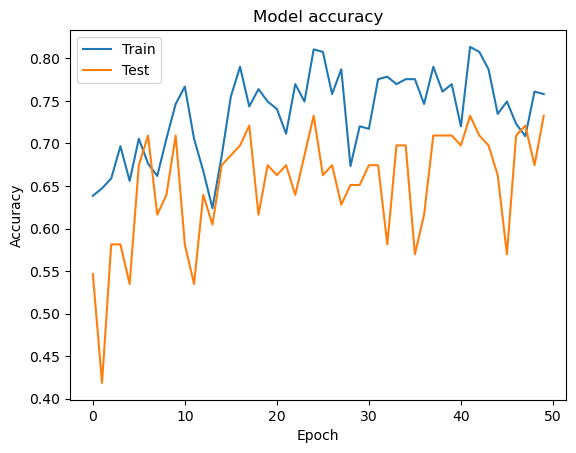

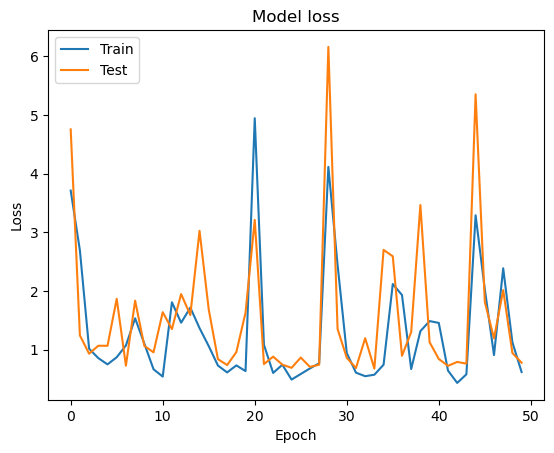

In [25]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()